In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
bike = pd.read_csv(uri)
bike.to_csv('../dados/bicilcetas.csv', index_label = False)

In [3]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datas        17414 non-null  object 
 1   contagem     17414 non-null  int64  
 2   temperatura  17414 non-null  float64
 3   sensacao     17414 non-null  float64
 4   umidade      17414 non-null  float64
 5   vel_vento    17414 non-null  float64
 6   clima        17414 non-null  float64
 7   feriado      17414 non-null  float64
 8   final_ds     17414 non-null  float64
 9   estacao      17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# Transformar tipo variavel data para datetime

bike.datas = pd.to_datetime(bike.datas)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datas        17414 non-null  datetime64[ns]
 1   contagem     17414 non-null  int64         
 2   temperatura  17414 non-null  float64       
 3   sensacao     17414 non-null  float64       
 4   umidade      17414 non-null  float64       
 5   vel_vento    17414 non-null  float64       
 6   clima        17414 non-null  float64       
 7   feriado      17414 non-null  float64       
 8   final_ds     17414 non-null  float64       
 9   estacao      17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


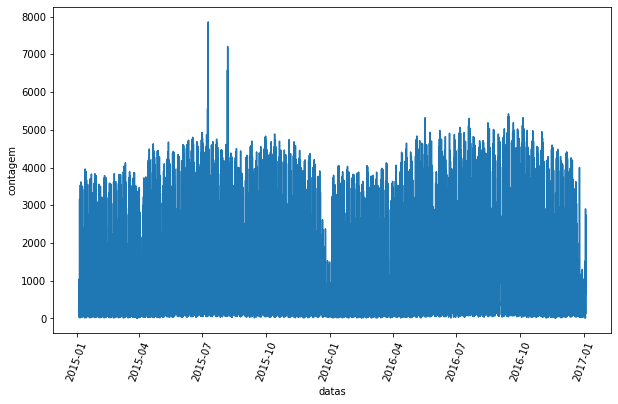

In [6]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'datas', y = 'contagem', data = bike)
plt.xticks(rotation = 70)
ax;

In [10]:
sc = StandardScaler()
y = sc.fit_transform(bike.contagem.values.reshape(-1,1))

In [15]:
y_train, y_test =  train_test_split(y, test_size=0.1, shuffle=False)
y_train.shape

(15672, 1)

<AxesSubplot:xlabel='datas'>

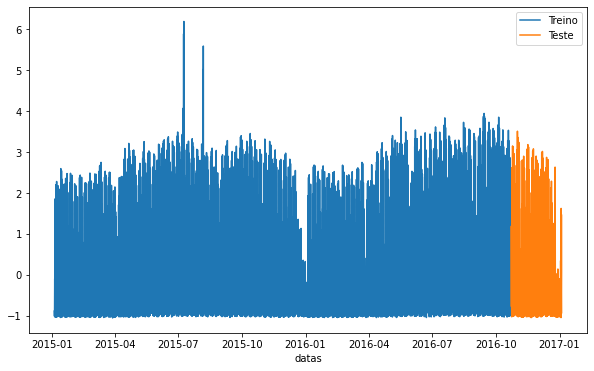

In [48]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'datas', y = y_train[:,0], data = bike[:15672], label = 'Treino')
sns.lineplot(x = 'datas', y = y_test[:,0], data = bike[15672:], label = 'Teste')


In [23]:
def separa_dados(vetor, n_passos : int):
    """Entrada: 
            	vetor: Número de passageiros
                n_passos: Número de passos no regressor
       Saída: 
                X_novo : Array 2D
                y_novo : Array 1D - Nosso alvo
    """
    
    X_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [26]:
vetor = pd.DataFrame(y_train)[0]

x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [62]:
vetor2 = pd.DataFrame(y_test)[0]

x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [28]:
x_treino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [30]:
x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0], x_treino_novo.shape[1], 1))

In [63]:
x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

In [39]:
recorrente = Sequential()

recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(units = 1))

recorrente.compile(loss='mean_squared_error', optimizer = 'RMSProp')

In [40]:
recorrente.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [41]:
resultados = recorrente.fit(x_treino_novo, y_treino_novo, 
                            validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 9ms/step - loss: 0.2580 - val_loss: 0.0948
Epoch 2/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0766 - val_loss: 0.0623
Epoch 3/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0551 - val_loss: 0.0507
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0471 - val_loss: 0.0565
Epoch 5/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0425 - val_loss: 0.0394
Epoch 6/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0395 - val_loss: 0.0382
Epoch 7/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0375 - val_loss: 0.0390
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0359 - val_loss: 0.0389
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0342 - val_loss: 0.0354
Epoch 10/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0327 - val_

In [64]:
y_treino_ajustado = recorrente.predict(x_treino_novo)
y_teste_ajustado = recorrente.predict(x_teste_novo)

<AxesSubplot:xlabel='datas'>

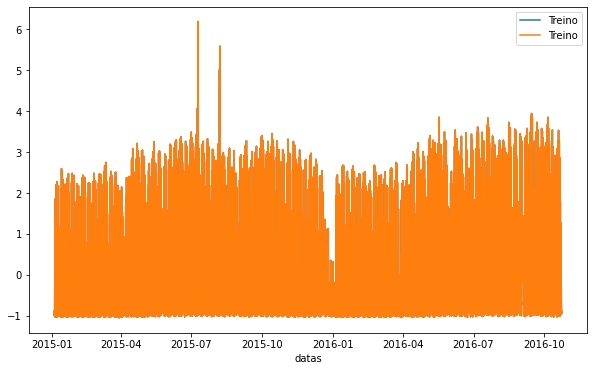

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'datas', y = y_train[:,0], data = bike[:15672], label = 'Treino')
sns.lineplot(x = 'datas', y = y_train[:,0], data = bike[:15672], label = 'Treino')


<AxesSubplot:xlabel='datas'>

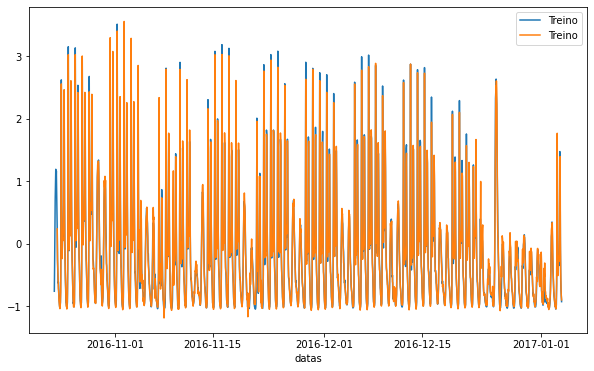

In [66]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'datas', y = y_test[:,0], data = bike[15672:], label = 'Treino')
sns.lineplot(x = 'datas', y = y_teste_ajustado[:,0], data = bike[15672+10:], label = 'Treino')

In [69]:
recorrente_g = Sequential()

recorrente_g.add(GRU(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente_g.add(Dense(units = 1))

recorrente_g.compile(loss='mean_squared_error', optimizer = 'RMSProp')

In [70]:
recorrente_g.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [71]:
resultados_2 = recorrente_g.fit(x_treino_novo, y_treino_novo, 
                            validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 8ms/step - loss: 0.2110 - val_loss: 0.0982
Epoch 2/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0661 - val_loss: 0.0471
Epoch 3/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0504 - val_loss: 0.0347
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0428 - val_loss: 0.0299
Epoch 5/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0387 - val_loss: 0.0210
Epoch 6/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0365 - val_loss: 0.0276
Epoch 7/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0348 - val_loss: 0.0395
Epoch 8/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0333 - val_loss: 0.0208
Epoch 9/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0324 - val_loss: 0.0191
Epoch 10/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0312 - val_lo

In [72]:
y_treino_ajustado = recorrente_g.predict(x_treino_novo)
y_teste_ajustado = recorrente_g.predict(x_teste_novo)

<AxesSubplot:xlabel='datas'>

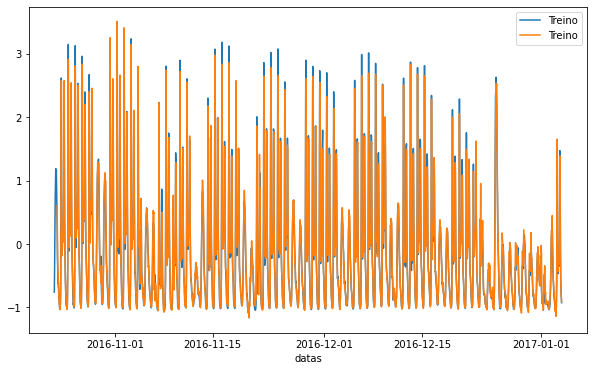

In [73]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'datas', y = y_test[:,0], data = bike[15672:], label = 'Treino')
sns.lineplot(x = 'datas', y = y_teste_ajustado[:,0], data = bike[15672+10:], label = 'Treino')

Text(0, 0.5, 'Perda')

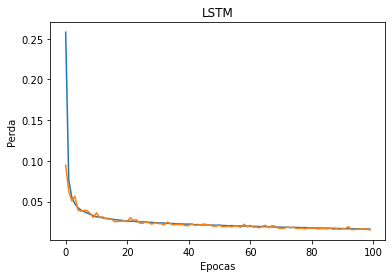

In [77]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.title('LSTM')
plt.xlabel('Epocas')
plt.ylabel('Perda')

Text(0, 0.5, 'Perda')

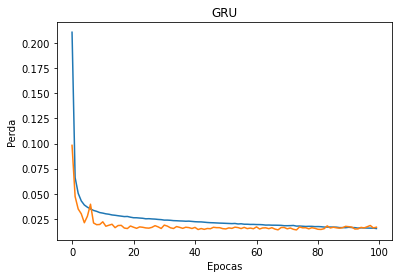

In [78]:
plt.plot(resultados_2.history['loss'])
plt.plot(resultados_2.history['val_loss'])
plt.title('GRU')
plt.xlabel('Epocas')
plt.ylabel('Perda')